In [30]:
import os
import base64
import requests
import subprocess

from IPython.display import display, Image

ENDPOINT_ID = "2099345929424338944"
PROJECT_ID = "vision-ml-first-test"

# This is cheating!!! Instead create an access key and store it in a key store!!!
GCLOUD_ACCESS_TOKEN = subprocess.check_output("gcloud auth print-access-token", shell=True).strip()

HEADERS = {'Authorization': "Bearer " + GCLOUD_ACCESS_TOKEN, 'Content-Type': 'application/json'}

END_POINT = "https://us-central1-prediction-aiplatform.googleapis.com/v1alpha1/projects/" + \
            PROJECT_ID + \
            "/locations/us-central1/endpoints/" + \
            ENDPOINT_ID + ":predict"

IMAGE_DIR = "images"
IMAGE_COUNT = 100

REQ_TEMPLATE = '{ \
  "instances": [{ \
    "content": "REQUEST_DATA" \
  }], \
  "parameters": { \
    "confidenceThreshold": 0.5, \
    "maxPredictions": 5\
  }\
}'


Actual: Dog
Predicted: Dog Confidence = 0.976597607
Time 0.901 Seconds


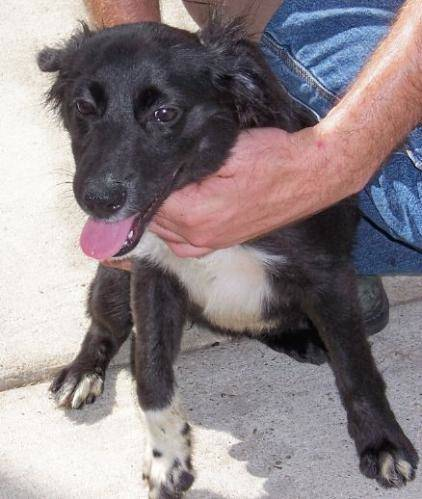

Actual: Dog
Predicted: Dog Confidence = 0.982221305
Time 0.499 Seconds


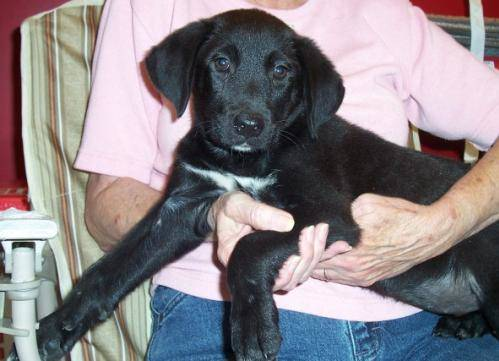

Actual: Cat
Predicted: Cat Confidence = 0.648602962
Time 0.492 Seconds


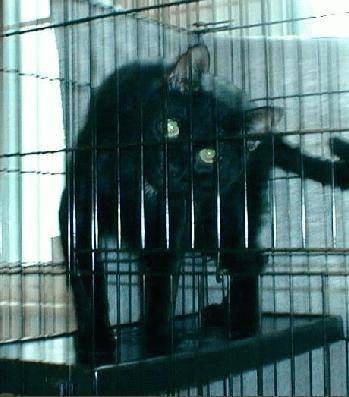

Actual: Dog
Predicted: Dog Confidence = 0.992672384
Time 0.504 Seconds


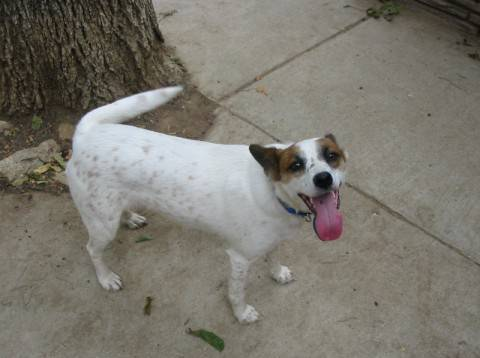

Actual: Dog
Predicted: Dog Confidence = 0.998944581
Time 0.600 Seconds


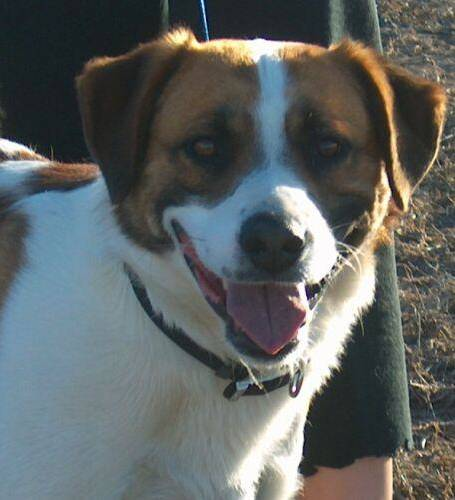

Actual: Dog
Predicted: Dog Confidence = 0.998904705
Time 0.599 Seconds


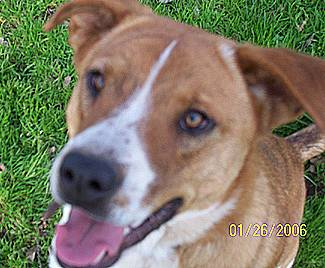

Actual: Dog
Predicted: Dog Confidence = 0.927318752
Time 0.499 Seconds


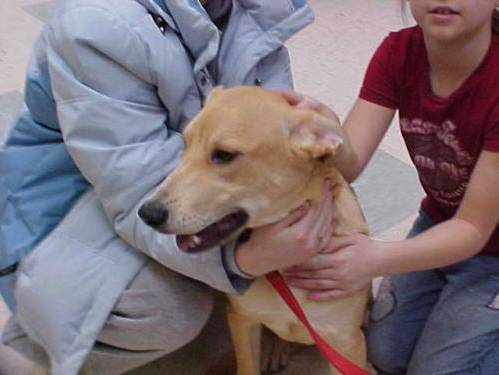

Actual: Cat
Predicted: Cat Confidence = 0.999308109
Time 0.499 Seconds


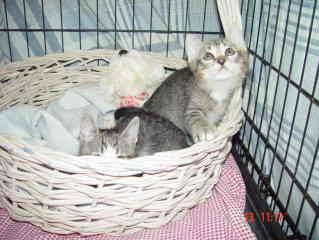

Actual: Dog
Predicted: Dog Confidence = 0.955492437
Time 0.566 Seconds


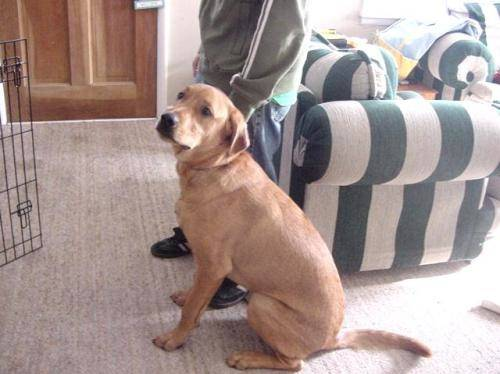

Actual: Dog
Predicted: Dog Confidence = 0.999099612
Time 0.529 Seconds


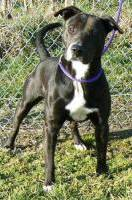

Actual: Cat
Predicted: Cat Confidence = 0.999131739
Time 0.254 Seconds


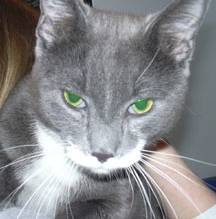

Actual: Cat
Predicted: Cat Confidence = 0.997499406
Time 0.535 Seconds


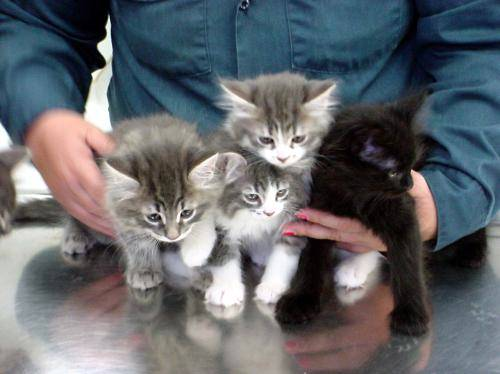

Actual: Dog
Predicted: Dog Confidence = 0.985161185
Time 0.498 Seconds


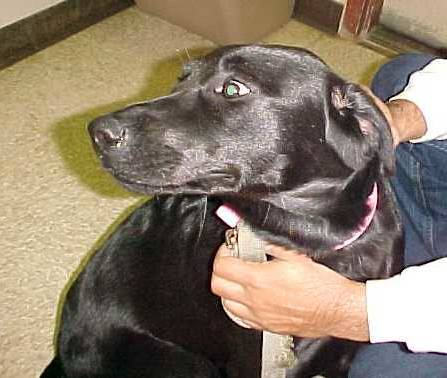

Actual: Dog
Predicted: Dog Confidence = 0.958662331
Time 0.498 Seconds


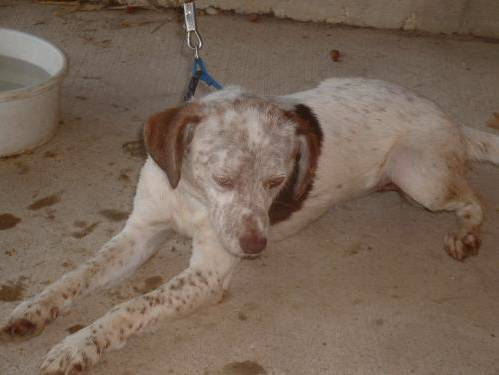

Actual: Cat
Predicted: Cat Confidence = 0.978737891
Time 0.499 Seconds


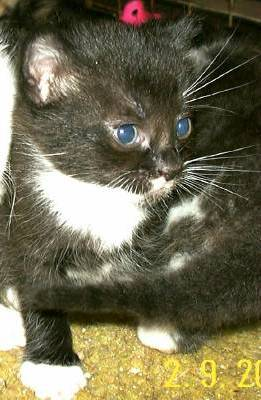

Actual: Cat
Predicted: Cat Confidence = 0.991550088
Time 0.498 Seconds


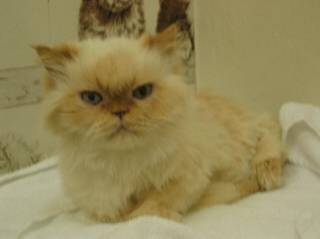

Actual: Dog
Predicted: Cat Confidence = 0.571855366
Time 0.392 Seconds


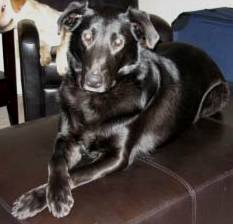

Actual: Cat
Predicted: Cat Confidence = 0.994846463
Time 0.499 Seconds


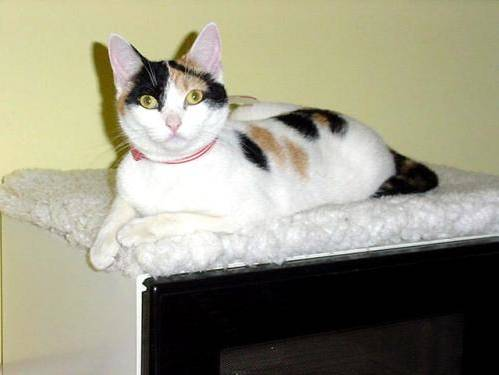

Actual: Cat
Predicted: Cat Confidence = 0.984267414
Time 0.497 Seconds


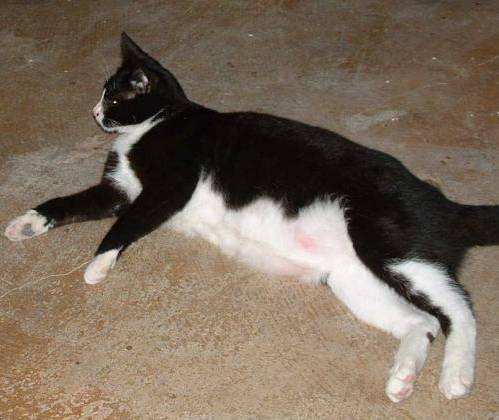

Actual: Cat
Predicted: Cat Confidence = 0.97124207
Time 0.499 Seconds


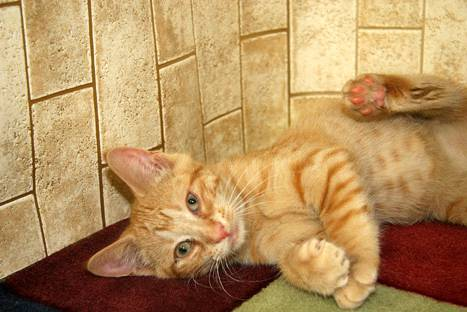

Actual: Cat
Predicted: Cat Confidence = 0.966702104
Time 0.497 Seconds


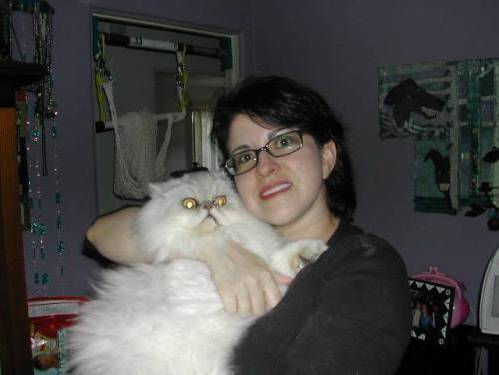

Actual: Dog
Predicted: Dog Confidence = 0.549265206
Time 0.702 Seconds


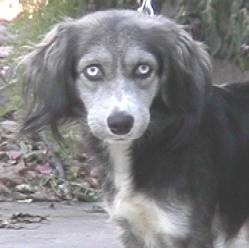

Actual: Cat
Predicted: Cat Confidence = 0.988215446
Time 0.498 Seconds


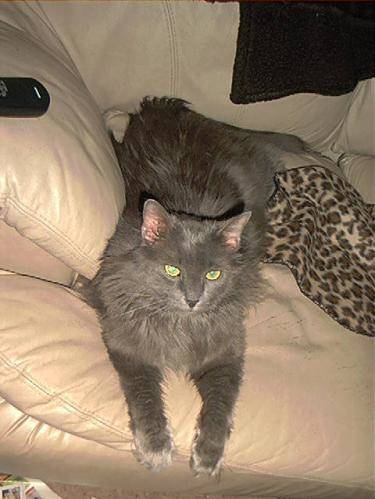

Actual: Dog
Predicted: Dog Confidence = 0.986212969
Time 0.463 Seconds


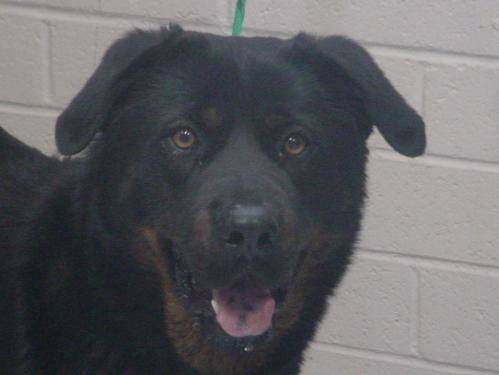

Actual: Dog
Predicted: Dog Confidence = 0.981676936
Time 0.414 Seconds


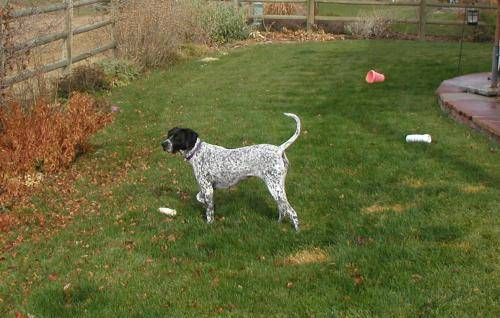

Actual: Cat
Predicted: Cat Confidence = 0.978753209
Time 0.752 Seconds


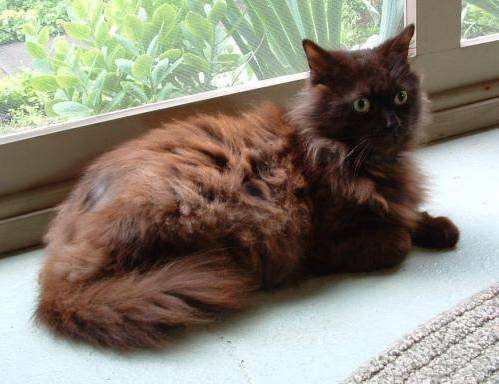

Actual: Cat
Predicted: Cat Confidence = 0.987930059
Time 0.473 Seconds


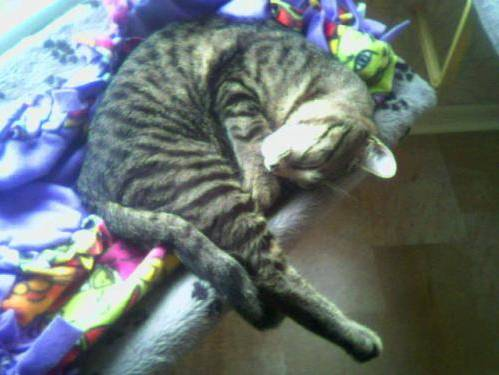

Actual: Cat
Predicted: Cat Confidence = 0.995906591
Time 0.435 Seconds


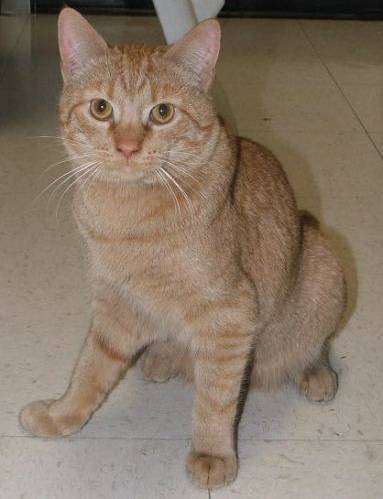

Actual: Dog
Predicted: Dog Confidence = 0.975913703
Time 0.459 Seconds


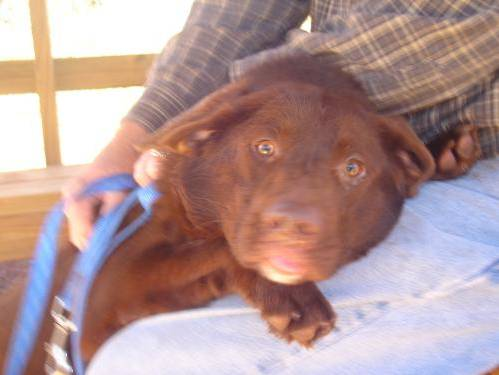

Actual: Dog
Predicted: Dog Confidence = 0.993241847
Time 0.497 Seconds


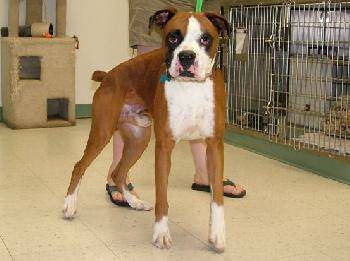

Actual: Dog
Predicted: Cat Confidence = 0.784916639
Time 0.600 Seconds


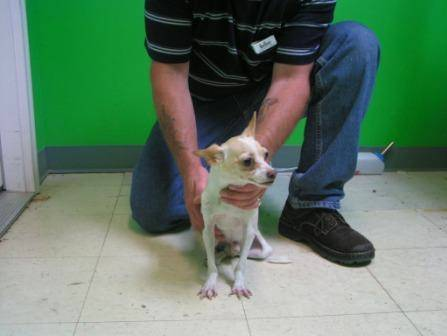

Actual: Cat
Predicted: Cat Confidence = 0.998394787
Time 0.498 Seconds


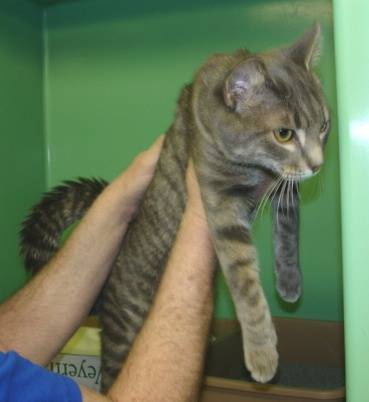

Actual: Dog
Predicted: Dog Confidence = 0.987751126
Time 0.499 Seconds


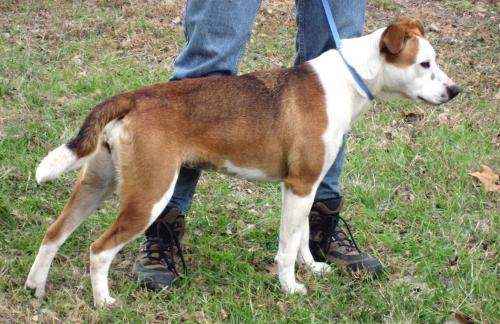

Actual: Dog
Predicted: Dog Confidence = 0.989883244
Time 0.497 Seconds


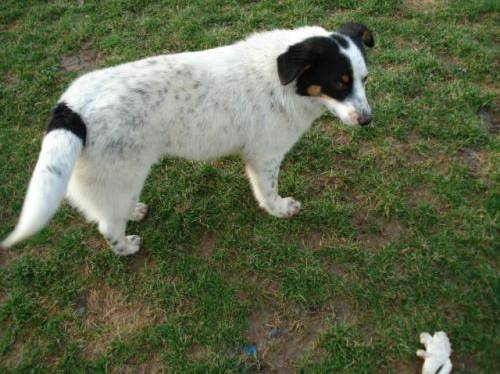

Actual: Cat
Predicted: Cat Confidence = 0.985841274
Time 0.521 Seconds


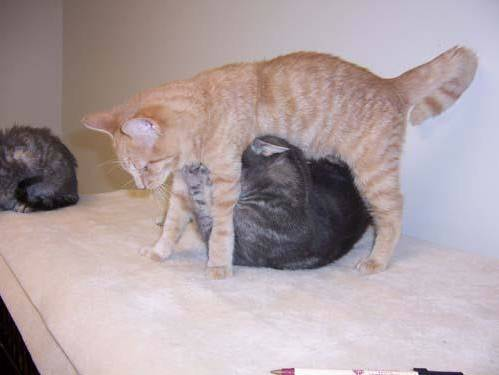

Actual: Dog
Predicted: Dog Confidence = 0.974665403
Time 3.178 Seconds


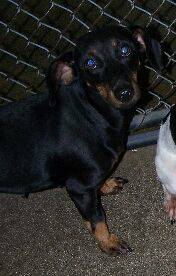

Actual: Dog
Predicted: Dog Confidence = 0.91372025
Time 1.274 Seconds


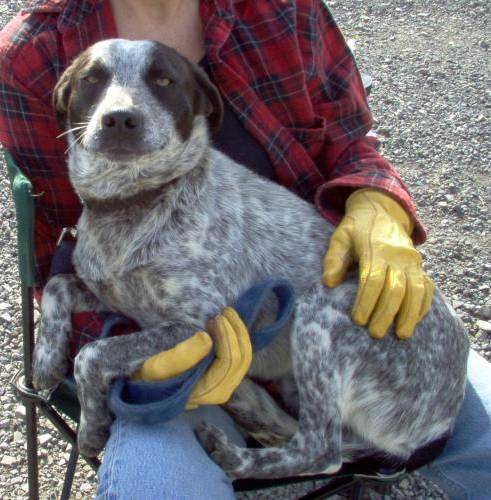

Actual: Dog
Predicted: Dog Confidence = 0.996299565
Time 1.528 Seconds


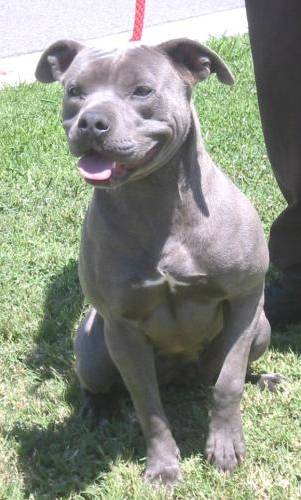

Actual: Dog
Predicted: Dog Confidence = 0.969361901
Time 1.573 Seconds


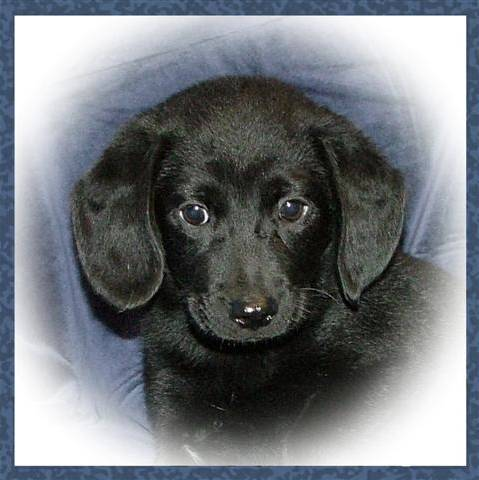

Actual: Cat
Predicted: Cat Confidence = 0.992182672
Time 0.653 Seconds


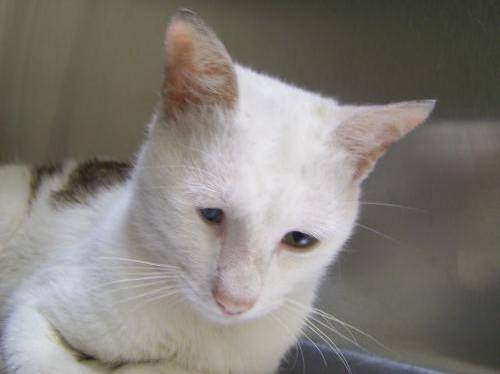

Actual: Cat
Predicted: Cat Confidence = 0.996308208
Time 0.487 Seconds


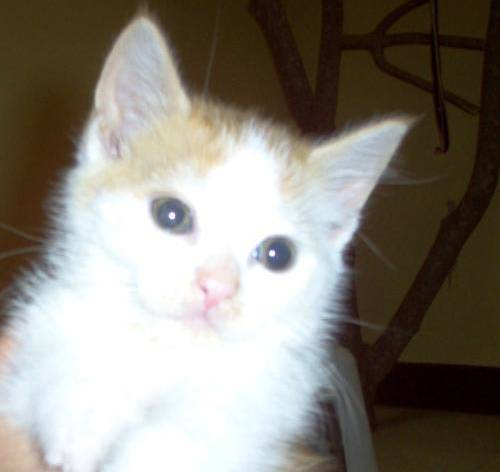

Actual: Cat
Predicted: Cat Confidence = 0.947823882
Time 0.497 Seconds


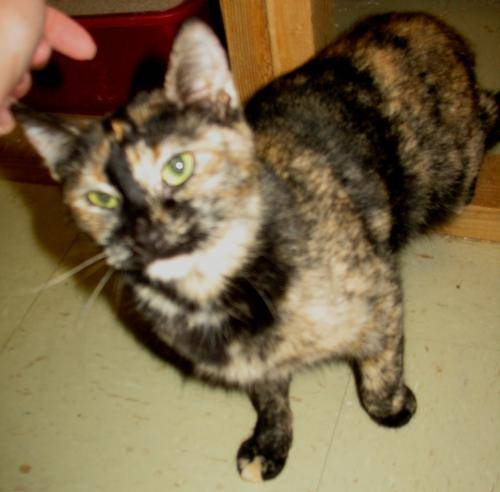

Actual: Cat
Predicted: Cat Confidence = 0.993238688
Time 0.396 Seconds


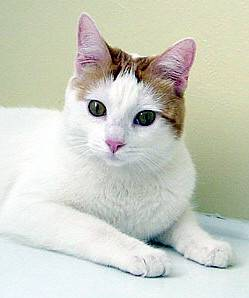

Actual: Cat
Predicted: Cat Confidence = 0.998437226
Time 0.499 Seconds


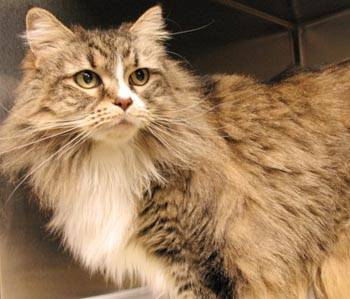

Actual: Dog
Predicted: Dog Confidence = 0.999587476
Time 0.498 Seconds


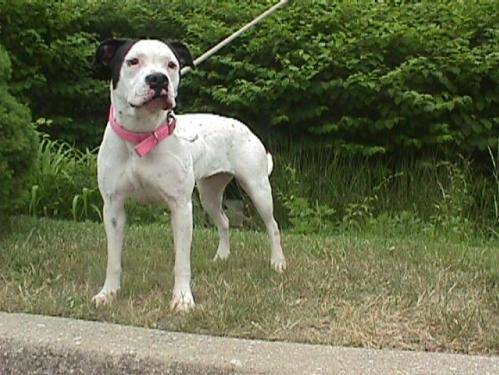

Actual: Cat
Predicted: Cat Confidence = 0.996908605
Time 0.424 Seconds


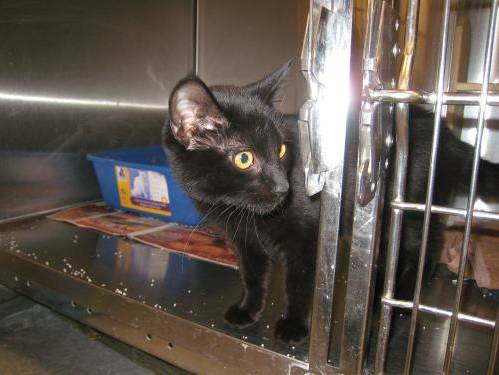

Actual: Dog
Predicted: Dog Confidence = 0.974187076
Time 0.466 Seconds


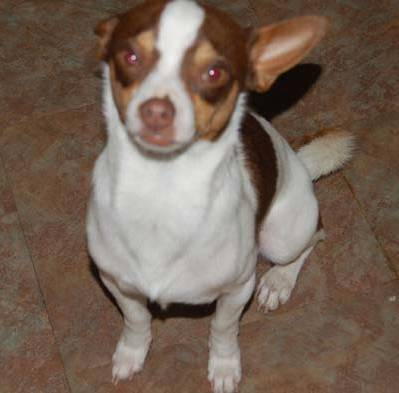

Actual: Cat
Predicted: Cat Confidence = 0.991490662
Time 0.498 Seconds


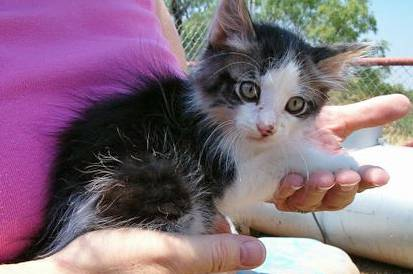

Actual: Dog
Predicted: Dog Confidence = 0.972541809
Time 0.602 Seconds


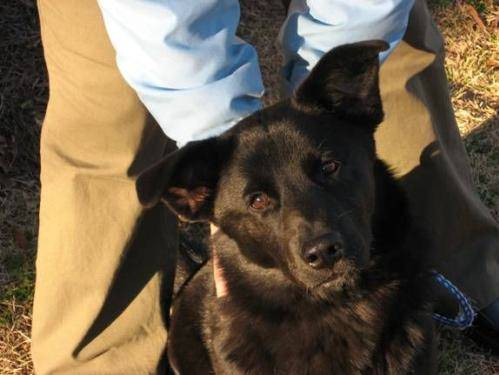

Actual: Dog
Predicted: Dog Confidence = 0.992658675
Time 0.398 Seconds


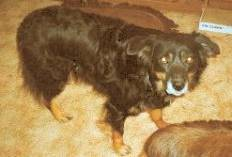

Actual: Dog
Predicted: Dog Confidence = 0.969815373
Time 0.497 Seconds


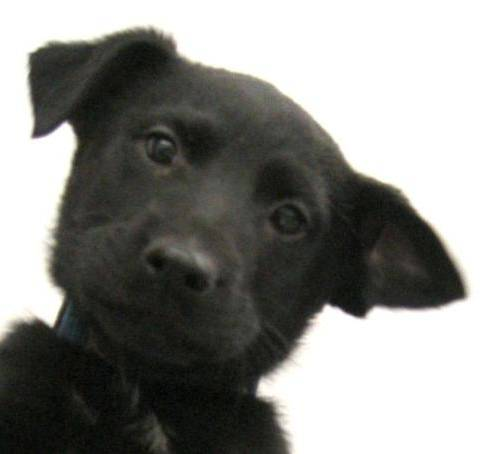

Actual: Cat
Predicted: Cat Confidence = 0.962388039
Time 0.497 Seconds


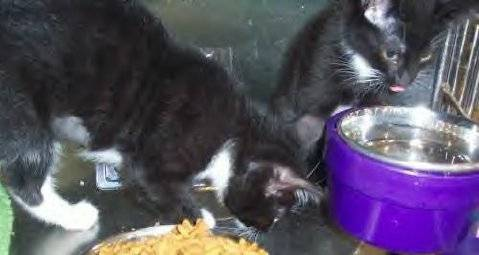

Actual: Dog
Predicted: Dog Confidence = 0.990637243
Time 0.360 Seconds


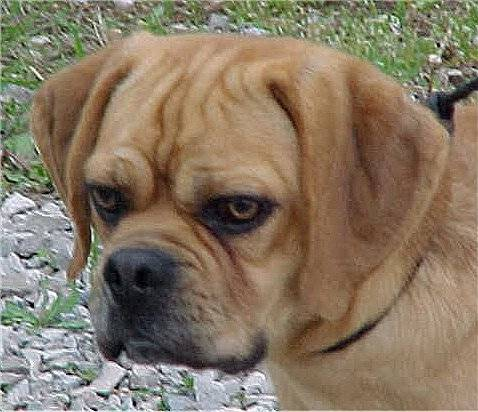

Actual: Cat
Predicted: Cat Confidence = 0.958784103
Time 0.532 Seconds


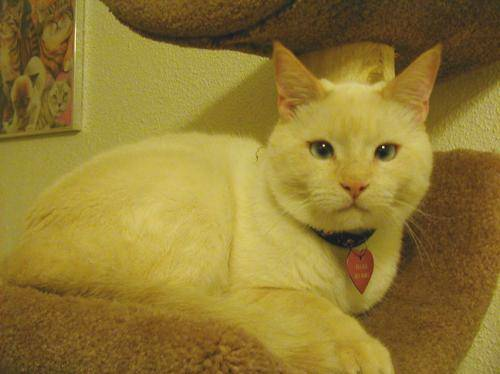

Actual: Dog
Predicted: Dog Confidence = 0.996794641
Time 0.499 Seconds


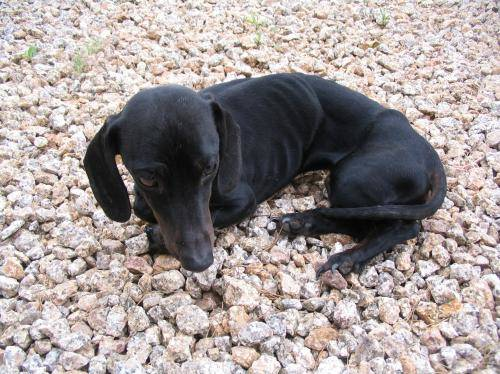

Actual: Cat
Predicted: Cat Confidence = 0.963566124
Time 0.499 Seconds


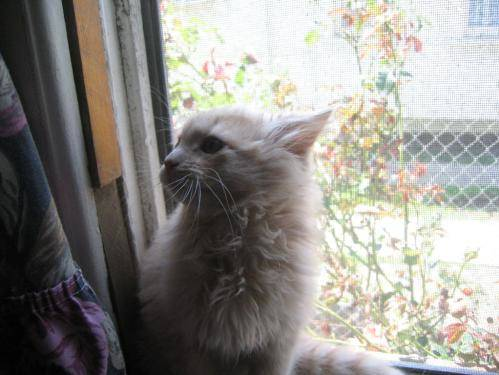

Actual: Dog
Predicted: Dog Confidence = 0.982439518
Time 0.499 Seconds


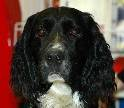

Actual: Dog
Predicted: Dog Confidence = 0.756884813
Time 0.497 Seconds


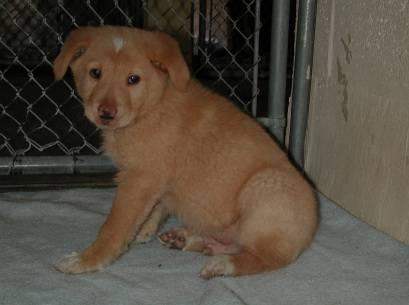

Actual: Dog
Predicted: Dog Confidence = 0.751529455
Time 0.498 Seconds


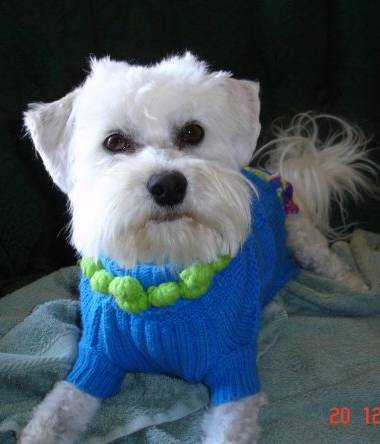

Actual: Dog
Predicted: Dog Confidence = 0.971606314
Time 0.501 Seconds


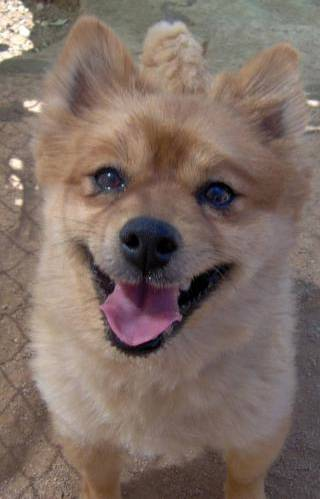

Actual: Cat
Predicted: Cat Confidence = 0.999633431
Time 0.495 Seconds


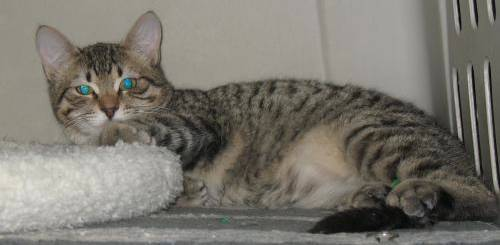

Actual: Dog
Predicted: Dog Confidence = 0.997289181
Time 0.499 Seconds


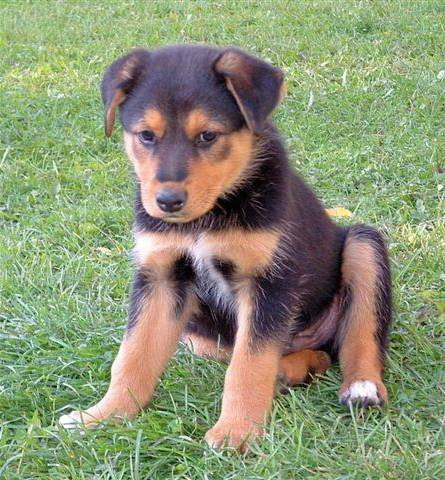

Actual: Cat
Predicted: Cat Confidence = 0.999793112
Time 0.499 Seconds


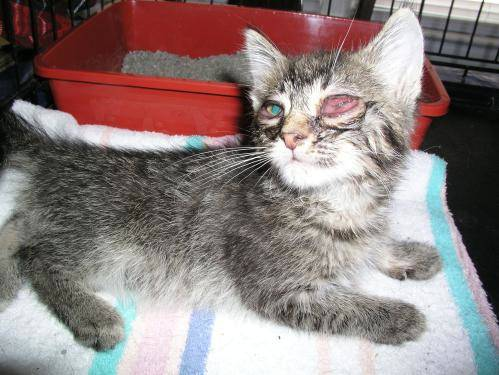

Actual: Cat
Predicted: Cat Confidence = 0.988298535
Time 0.395 Seconds


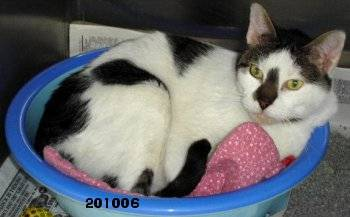

Actual: Cat
Predicted: Cat Confidence = 0.959727
Time 0.499 Seconds


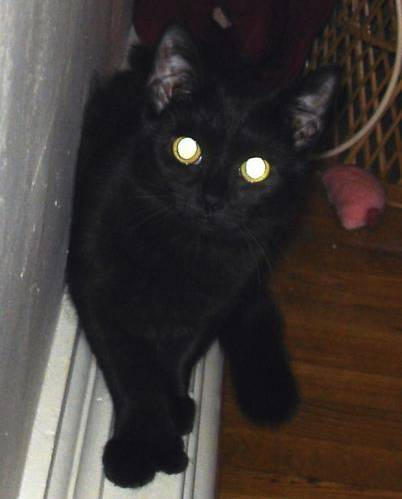

Actual: Cat
Predicted: Cat Confidence = 0.976483
Time 0.498 Seconds


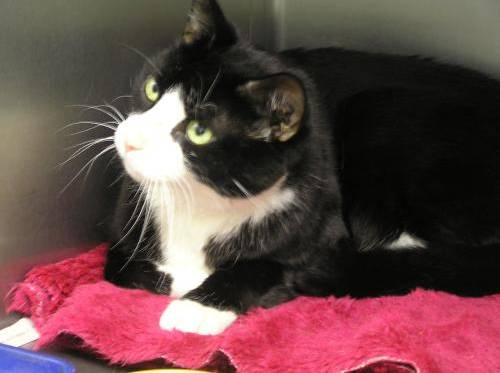

Actual: Dog
Predicted: Dog Confidence = 0.995076239
Time 0.499 Seconds


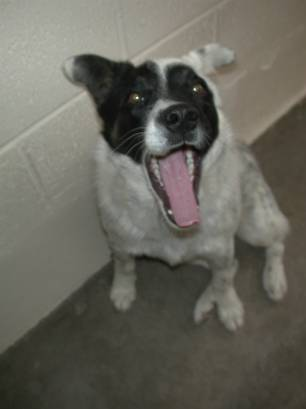

Actual: Dog
Predicted: Dog Confidence = 0.989647
Time 0.499 Seconds


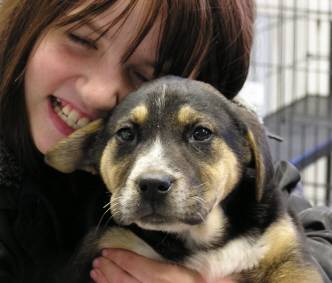

Actual: Dog
Predicted: Dog Confidence = 0.999242783
Time 0.470 Seconds


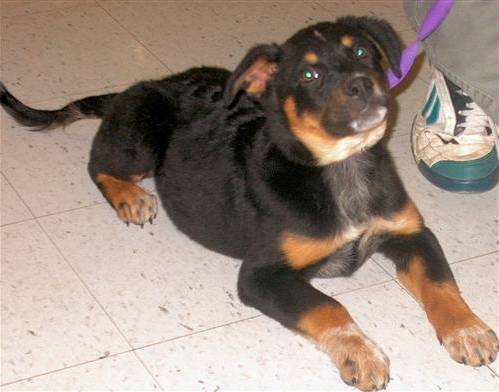

Actual: Cat
Predicted: Cat Confidence = 0.994457841
Time 0.497 Seconds


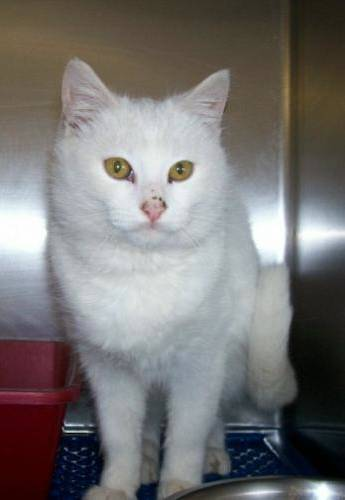

Actual: Dog
Predicted: Dog Confidence = 0.695921659
Time 0.398 Seconds


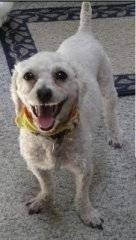

Actual: Dog
Predicted: Dog Confidence = 0.874429464
Time 0.498 Seconds


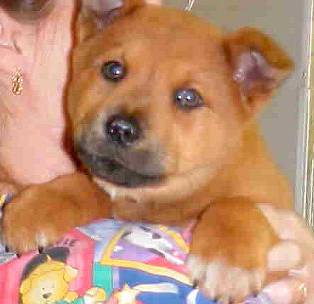

Actual: Dog
Predicted: Dog Confidence = 0.940146148
Time 0.500 Seconds


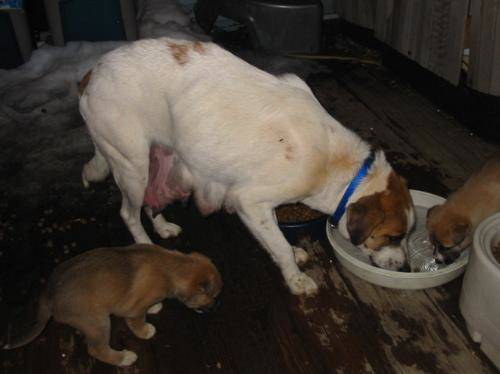

Actual: Cat
Predicted: Cat Confidence = 0.996932268
Time 0.483 Seconds


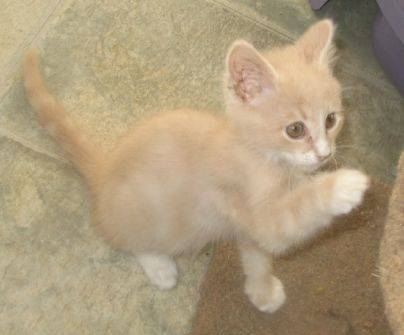

Actual: Cat
Predicted: Cat Confidence = 0.997279
Time 0.427 Seconds


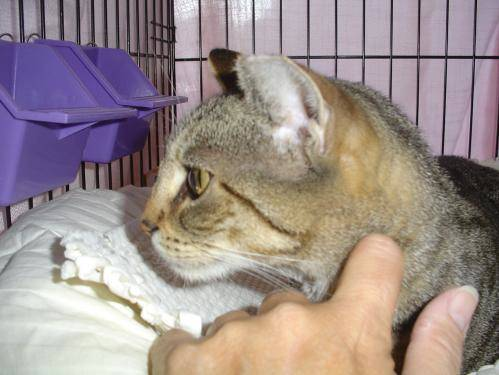

Actual: Cat
Predicted: Cat Confidence = 0.978934348
Time 0.480 Seconds


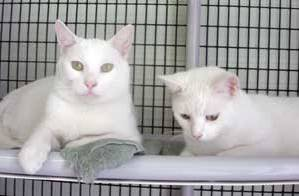

Actual: Dog
Predicted: Dog Confidence = 0.847648
Time 0.498 Seconds


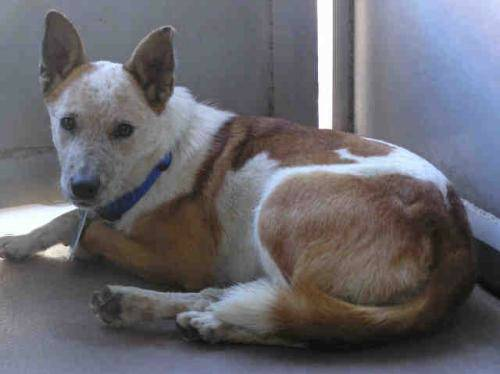

Actual: Dog
Predicted: Dog Confidence = 0.965087712
Time 0.442 Seconds


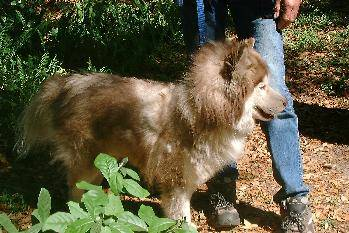

Actual: Cat
Predicted: Cat Confidence = 0.998494506
Time 0.451 Seconds


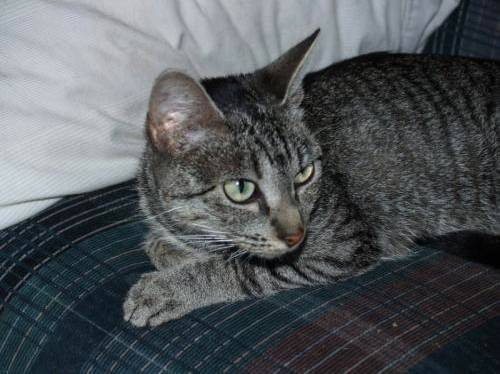

Actual: Dog
Predicted: Dog Confidence = 0.987382
Time 0.497 Seconds


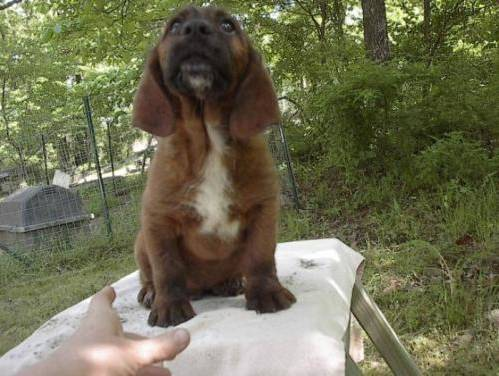

Actual: Cat
Predicted: Cat Confidence = 0.981835246
Time 0.394 Seconds


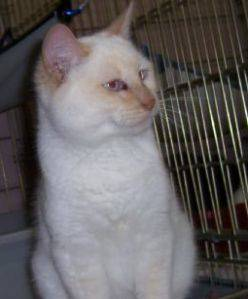

Actual: Cat
Predicted: Cat Confidence = 0.833795547
Time 0.498 Seconds


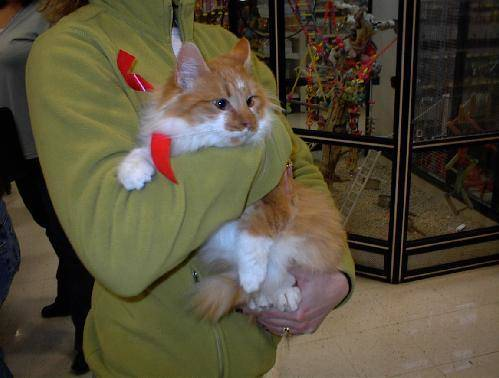

Actual: Cat
Predicted: Cat Confidence = 0.986273348
Time 0.402 Seconds


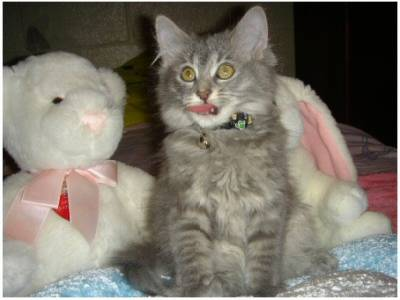

Actual: Cat
Predicted: Cat Confidence = 0.998995125
Time 0.491 Seconds


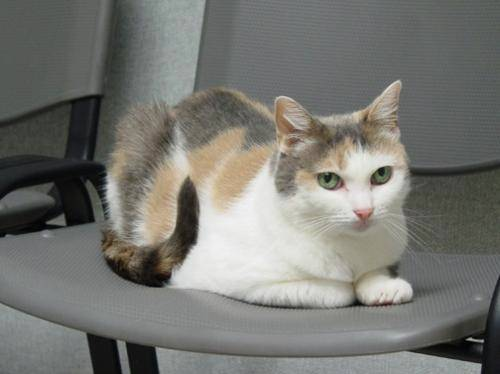

Actual: Cat
Predicted: Cat Confidence = 0.93559891
Time 0.270 Seconds


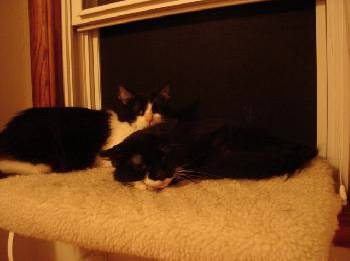

Actual: Cat
Predicted: Cat Confidence = 0.996901631
Time 0.419 Seconds


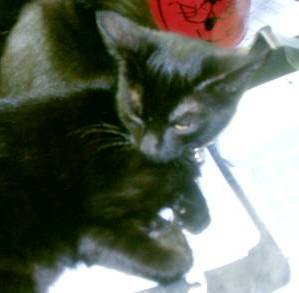

Actual: Dog
Predicted: Dog Confidence = 0.997090578
Time 0.435 Seconds


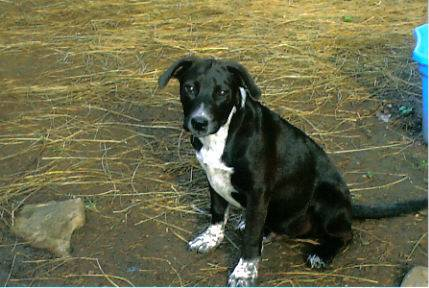

Actual: Dog
Predicted: Dog Confidence = 0.991817296
Time 0.460 Seconds


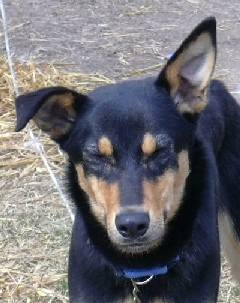

Actual: Dog
Predicted: Dog Confidence = 0.892027497
Time 0.503 Seconds


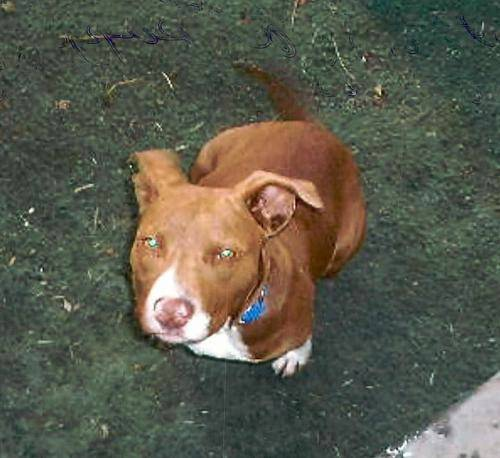

Actual: Cat
Predicted: Cat Confidence = 0.99537462
Time 0.493 Seconds


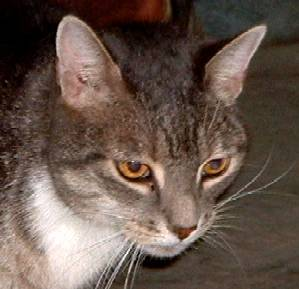

Actual: Cat
Predicted: Cat Confidence = 0.997282743
Time 0.498 Seconds


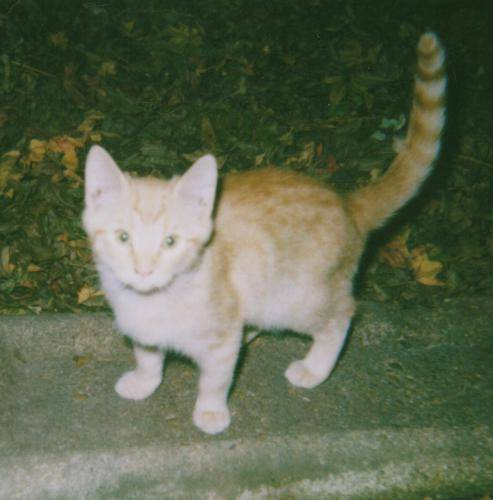

Actual: Dog
Predicted: Dog Confidence = 0.995142698
Time 0.497 Seconds


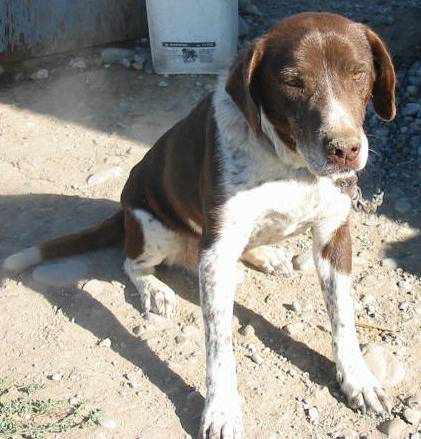

Actual: Cat
Predicted: Cat Confidence = 0.998771608
Time 0.498 Seconds


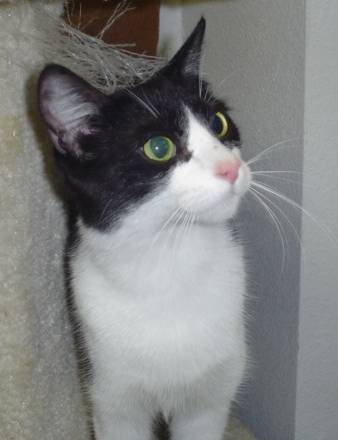

Actual: Dog
Predicted: Dog Confidence = 0.997255623
Time 0.603 Seconds


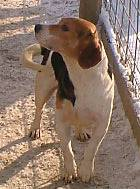

Actual: Dog
Predicted: Dog Confidence = 0.991318762
Time 0.498 Seconds


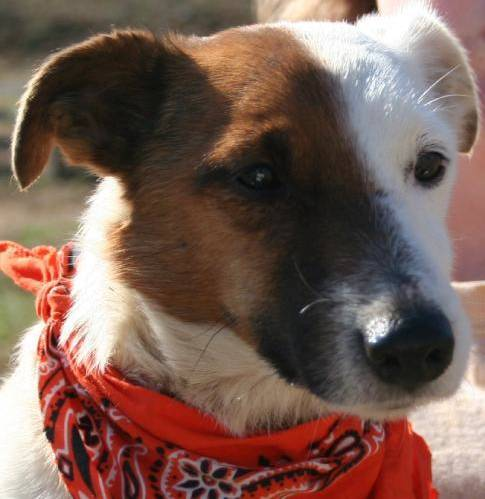

Actual: Dog
Predicted: Dog Confidence = 0.996045291
Time 0.496 Seconds


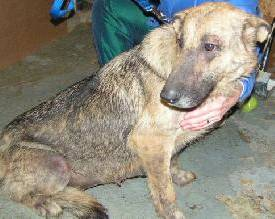

Actual: Dog
Predicted: Dog Confidence = 0.967933834
Time 0.403 Seconds


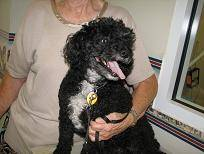

Actual: Dog
Predicted: Dog Confidence = 0.87975
Time 0.384 Seconds


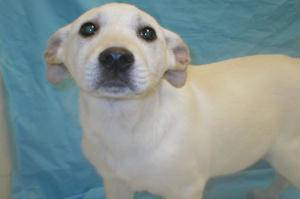

Actual: Dog
Predicted: Dog Confidence = 0.984283328
Time 0.238 Seconds


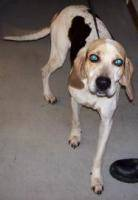

Actual: Dog
Predicted: Dog Confidence = 0.991774917
Time 0.390 Seconds


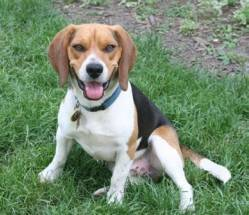

In [31]:
import random
from enum import Enum

# Enum for labeling
class Label(Enum):
    Cat = 0
    Dog = 1

import numpy as np
counts = np.zeros((2,2))

# Find the files and pull a sample
files_all = os.listdir(IMAGE_DIR)
files_sample = random.sample(files_all, IMAGE_COUNT)

for file_name in files_sample:
    
    # Get the image data
    full_file_name = IMAGE_DIR + "/" + file_name
    in_file = open(full_file_name)
    file_data = in_file.read()
    in_file.close()
    
    # Encode and create request
    file_base64_string = base64 \
                .b64encode(file_data) \
                .decode('ascii')
    req_data = REQ_TEMPLATE.replace("REQUEST_DATA", file_base64_string)
    
    # Call the Google API and time it
    resp = requests.post(END_POINT, data=req_data, headers=HEADERS)
    resp.raise_for_status()
    
    # Pull out the response data and print it
    prediction = resp.json()["predictions"][0]
    
    predicted_label = prediction["displayNames"][0]
    actual_label = file_name[0:3].capitalize()
    
    print "Actual:", actual_label
    print "Predicted:", predicted_label, "Confidence =", prediction["confidences"][0]
    print "Time", '{:5.3f}'.format(resp.elapsed.total_seconds()), "Seconds"

    counts[Label[actual_label].value, Label[predicted_label].value] += 1
    
    #Show the image
    display(Image(full_file_name))

In [33]:
from prettytable import PrettyTable
from IPython.display import HTML
table = PrettyTable()
table.add_column("", ["Dog", "Cat"])
table.add_column("Dog", [counts[0,0], counts[0,1]])
table.add_column("Cat", [counts[1,0], counts[1,1]])
display(HTML(table.get_html_string()))

,Dog,Cat
Dog,45.0,2.0
Cat,0.0,53.0
